In [8]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from itertools import product

In [9]:
data = pd.read_csv("Algerian_forest_fires_dataset.csv")
data.tail()

,Bejaia Region Dataset,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,NaN
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,NaN
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,NaN
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,NaN
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bejaia Region Dataset  246 non-null    object 
 1   day                    245 non-null    object 
 2   month                  245 non-null    object 
 3   year                   245 non-null    object 
 4   Temperature            245 non-null    object 
 5    RH                    245 non-null    object 
 6    Ws                    245 non-null    object 
 7   Rain                   245 non-null    object 
 8   FFMC                   245 non-null    object 
 9   DMC                    245 non-null    object 
 10  DC                     245 non-null    object 
 11  ISI                    245 non-null    object 
 12  BUI                    245 non-null    object 
 13  FWI                    244 non-null    object 
 14  Classes                0 non-null      float64
dtypes: flo

## Cleaning data

In [11]:
nuevos_nombres = {' RH': 'Relative_Humidity',
                  ' Ws': 'Wind_Speed',
                 'FFMC': 'Fine_Fuel_Moisture_Code',
                 'DMC': 'Duff_Moisture_Code',
                 'DC': 'Drought_Code',
                 'ISI': 'Initial_Spread_Index',
                 'BUI': 'Buildup_Index',
                 'FWI': 'Fire_Weather_Index',
                 'Rain ':'Rain',
                 'Classes  ':'Classes'}

data.rename(columns=nuevos_nombres, inplace=True)
#data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bejaia Region Dataset    246 non-null    object 
 1   day                      245 non-null    object 
 2   month                    245 non-null    object 
 3   year                     245 non-null    object 
 4   Temperature              245 non-null    object 
 5   Relative_Humidity        245 non-null    object 
 6   Wind_Speed               245 non-null    object 
 7   Rain                     245 non-null    object 
 8   Fine_Fuel_Moisture_Code  245 non-null    object 
 9   Duff_Moisture_Code       245 non-null    object 
 10  Drought_Code             245 non-null    object 
 11  Initial_Spread_Index     245 non-null    object 
 12  Buildup_Index            245 non-null    object 
 13  Fire_Weather_Index       244 non-null    object 
 14  Classes                  0

In [12]:
data.day.unique()

array(['06', '07', '08', '09', nan, 'month'], dtype=object)

In [13]:
data.nunique()

Bejaia Region Dataset       33
day                          5
month                        2
year                        20
Temperature                 63
Relative_Humidity           19
Wind_Speed                  40
Rain                       174
Fine_Fuel_Moisture_Code    167
Duff_Moisture_Code         199
Drought_Code               107
Initial_Spread_Index       175
Buildup_Index              128
Fire_Weather_Index           9
Classes                      0
dtype: int64

In [14]:
data[data.isnull().any(axis=1)]

,Bejaia Region Dataset,day,month,year,Temperature,Relative_Humidity,Wind_Speed,Rain,Fine_Fuel_Moisture_Code,Duff_Moisture_Code,Drought_Code,Initial_Spread_Index,Buildup_Index,Fire_Weather_Index,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,NaN
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,NaN
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,NaN
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,NaN
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,NaN
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,NaN
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,NaN
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,NaN


In [15]:
#Dividir el data set en dos. regiones (0,1)
data.loc[:122,"Region"]=0
data.loc[122:,"Region"]=1
data=data

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bejaia Region Dataset    246 non-null    object 
 1   day                      245 non-null    object 
 2   month                    245 non-null    object 
 3   year                     245 non-null    object 
 4   Temperature              245 non-null    object 
 5   Relative_Humidity        245 non-null    object 
 6   Wind_Speed               245 non-null    object 
 7   Rain                     245 non-null    object 
 8   Fine_Fuel_Moisture_Code  245 non-null    object 
 9   Duff_Moisture_Code       245 non-null    object 
 10  Drought_Code             245 non-null    object 
 11  Initial_Spread_Index     245 non-null    object 
 12  Buildup_Index            245 non-null    object 
 13  Fire_Weather_Index       244 non-null    object 
 14  Classes                  0

In [17]:
#cambiar el tipo de dato de Region de float a int64
data[['Region']]=data[['Region']].astype(int)

In [18]:
#Contar el total de datos nulos en la columna
data.isnull().sum()

Bejaia Region Dataset        0
day                          1
month                        1
year                         1
Temperature                  1
Relative_Humidity            1
Wind_Speed                   1
Rain                         1
Fine_Fuel_Moisture_Code      1
Duff_Moisture_Code           1
Drought_Code                 1
Initial_Spread_Index         1
Buildup_Index                1
Fire_Weather_Index           2
Classes                    246
Region                       0
dtype: int64

In [19]:
#Eliminar los valores y reiniciar el index
data=data.dropna().reset_index(drop=True)
#data.isnull().sum() #Para ver que no hay nulos

In [21]:
data.iloc[[122]]

IndexError: single positional indexer is out-of-bounds

In [22]:
data = data.drop(122).reset_index(drop=True)
data.iloc[[122]]

KeyError: '[122] not found in axis'

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bejaia Region Dataset    0 non-null      object 
 1   day                      0 non-null      object 
 2   month                    0 non-null      object 
 3   year                     0 non-null      object 
 4   Temperature              0 non-null      object 
 5   Relative_Humidity        0 non-null      object 
 6   Wind_Speed               0 non-null      object 
 7   Rain                     0 non-null      object 
 8   Fine_Fuel_Moisture_Code  0 non-null      object 
 9   Duff_Moisture_Code       0 non-null      object 
 10  Drought_Code             0 non-null      object 
 11  Initial_Spread_Index     0 non-null      object 
 12  Buildup_Index            0 non-null      object 
 13  Fire_Weather_Index       0 non-null      object 
 14  Classes                  0 non-null   

In [24]:
data.Classes.unique()

array([], dtype=float64)

In [25]:
reemplazos = {'not fire   ': 0,'fire   ': 1,'not fire': 0,'not fire     ': 0,'not fire    ':0 ,'fire':1,'fire ':1,'not fire ':0}
data['Classes'] = data['Classes'].replace(reemplazos)
data.Classes.unique()

array([], dtype=float64)

In [26]:
data = data.astype({
    "day": int,
    "month": int,
    "year": int,
    "Temperature": int,
    "Relative_Humidity": int,
    "Wind_Speed": int,
    "Rain": float,
    "Fine_Fuel_Moisture_Code": float,
    "Duff_Moisture_Code": float,
    "Drought_Code": float,
    "Duff_Moisture_Code": float,
    "Initial_Spread_Index": float,
    "Buildup_Index": float,
    "Buildup_Index": float,
    "Fire_Weather_Index":float,
    'Classes':int
})
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Bejaia Region Dataset    0 non-null      object 
 1   day                      0 non-null      int32  
 2   month                    0 non-null      int32  
 3   year                     0 non-null      int32  
 4   Temperature              0 non-null      int32  
 5   Relative_Humidity        0 non-null      int32  
 6   Wind_Speed               0 non-null      int32  
 7   Rain                     0 non-null      float64
 8   Fine_Fuel_Moisture_Code  0 non-null      float64
 9   Duff_Moisture_Code       0 non-null      float64
 10  Drought_Code             0 non-null      float64
 11  Initial_Spread_Index     0 non-null      float64
 12  Buildup_Index            0 non-null      float64
 13  Fire_Weather_Index       0 non-null      float64
 14  Classes                  0 non-null   

In [27]:
data.drop(['day','month','year','Region'],axis=1,inplace =True)

## EDA

data.head()

In [28]:
#Import all the libraries
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

ModuleNotFoundError: No module named 'plotly'

We need to check if our data is balance, in this case the difference is not big sso we cant day that is complete unbalance

In [29]:
px.pie(data, names="Classes", title="Distribution of fire(1) or not fire(0)", template="none")

NameError: name 'px' is not defined

We need to check also the distribution of the features: Here some of them 
- **Fine_Fuel_Moisture_Code**, es la humedad del combustible fino muerto. Estos combustible se encuentran en el estrato superficial del suelo
- **Duff_Moisture_Code**, es la humedad del mantillo(Capa superior del suelo formada principalmente por materia orgánica en descomposición.) Predice cómo arden los combustibles situados en el estrato medio del mantillo.
- **Drought_Code**, evalúa el contenido de humedad de las capas más profundas del suelo forestal y de los combustibles muertos de mayor categoría de tamaño.
- **Initial_Spread_Index**, es una calificación numérica de la tasa de propagación del fuego, sin la influencia de combustible.
- **Buildup_Index**, indica la cantidad de combustible vegetal disponible y orienta respecto a la dificultad para el control de incendios.
- **Fire_Weather_Index**, representa la intensidad de propagación del fuego y puede ser considerado como un índice de comportamiento del fuego.

/var/folders/d5/krhffmy96_757h3n6_v42tlr0000gn/T/ipykernel_28702/3046159237.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



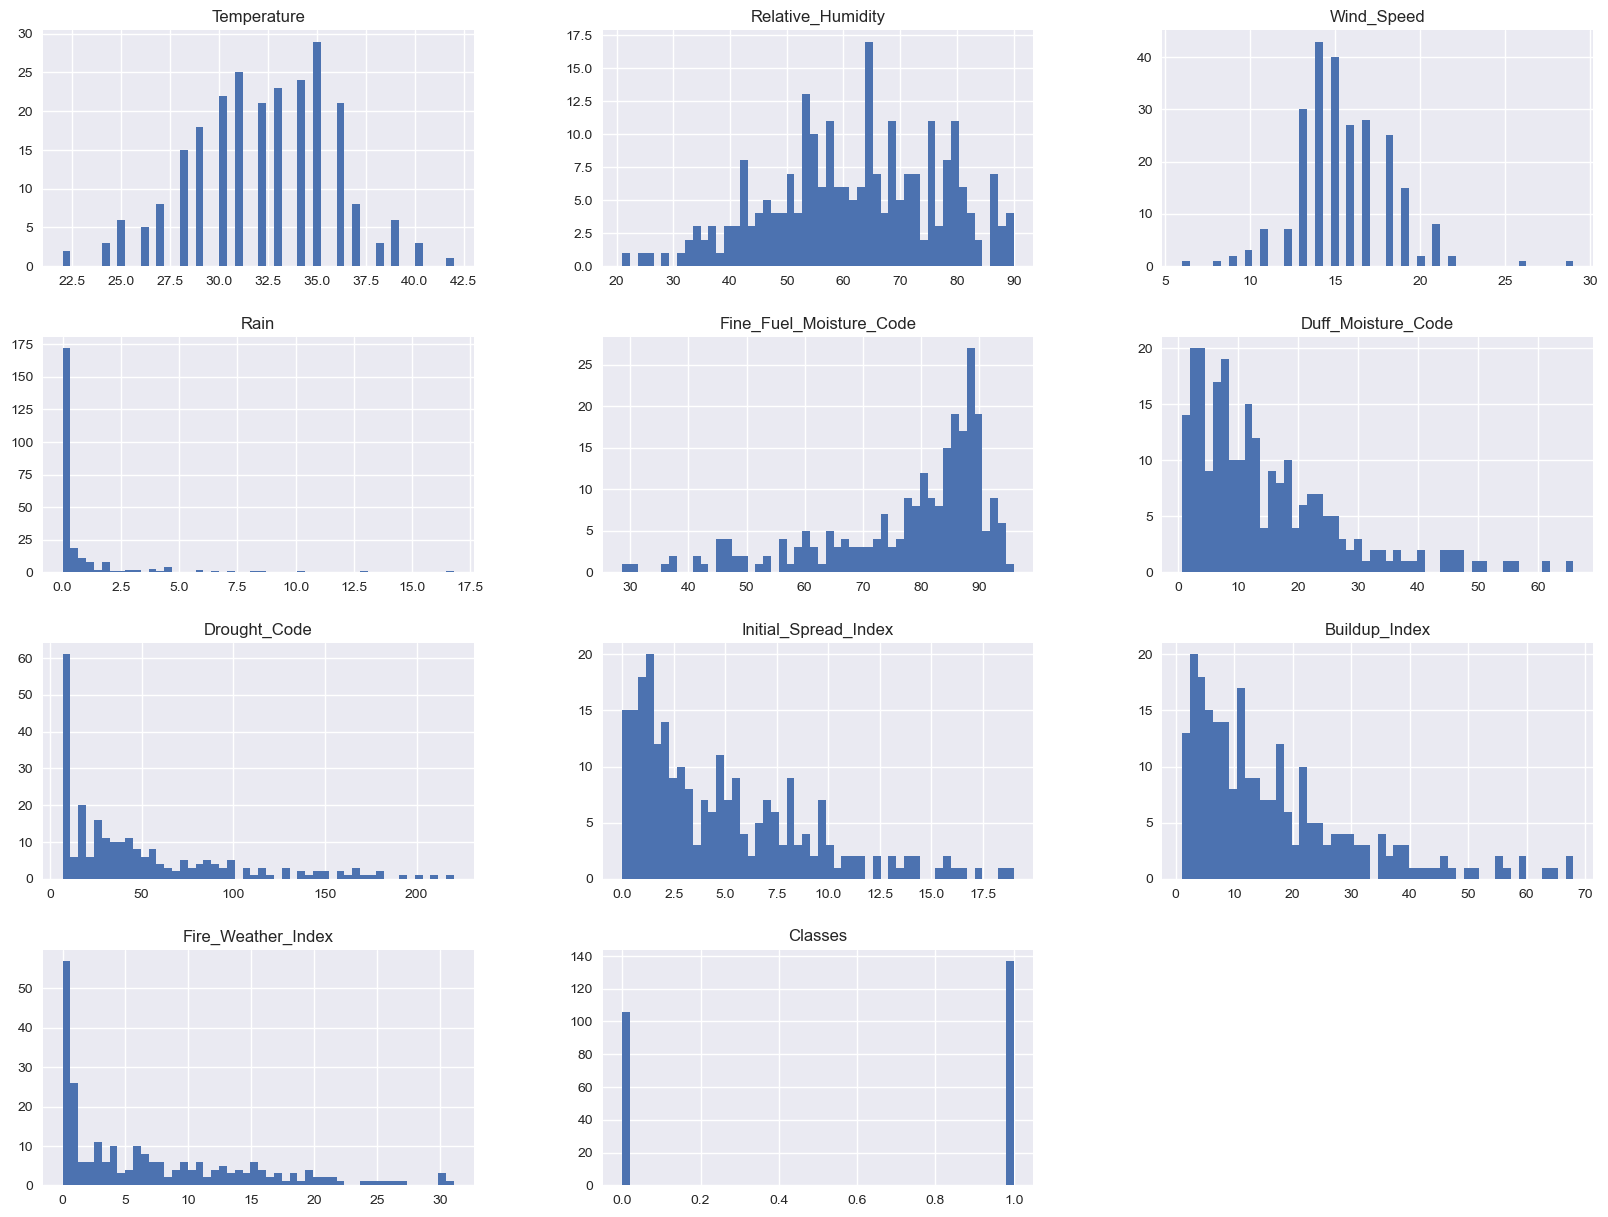

In [22]:
plt.style.use('seaborn')
data.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot: >

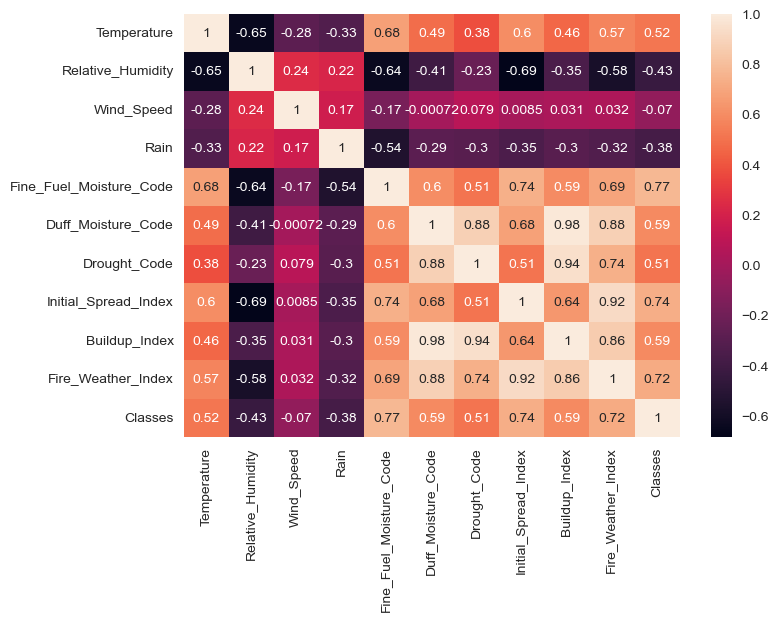

In [23]:
#Analisis de correlation 
sns.heatmap(data.corr(),annot=True)

## Build a model

#### Prepare data

In [24]:
X = data.drop(columns=["Classes"])
y = data["Classes"]

In [27]:
from sklearn.preprocessing import StandardScaler
import joblib
scaler_fire = StandardScaler()
X_scaled = scaler_fire.fit_transform(X)
joblib.dump(scaler_fire,'scaler_fire.pkl')
X_scaled

array([[-0.87065469, -0.34067323,  0.8932769 , ..., -0.83035573,
        -0.93601155, -0.88015863],
       [-0.87065469, -0.07035945, -0.88887652, ..., -0.90272026,
        -0.90079808, -0.8936262 ],
       [-1.69925426,  1.34878787,  2.31899963, ..., -1.07157084,
        -0.98531039, -0.93402893],
       ...,
       [-1.42305441,  1.68668009,  4.81401441, ..., -1.04744933,
        -0.93601155, -0.92056135],
       [-2.25165398, -0.54340856,  0.8932769 , ..., -0.73386968,
        -0.81628577, -0.85322348],
       [-2.25165398,  0.13237588, -0.17601515, ..., -0.85447724,
        -0.83741385, -0.88015863]])

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,stratify=y)
display(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(194, 10)

(49, 10)

(194,)

(49,)

#### Lets train the model

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
parameters = {'n_neighbors':range(3, 51)}

In [30]:
grid_search = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy')
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

In [31]:
grid_search.best_params_

{'n_neighbors': 32}

In [32]:
grid_search.best_score_

0.9535762483130904

#### Model

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, auc, roc_auc_score
import plotly.graph_objects as go

In [35]:
proba_train = clf.predict_proba(X_train)
pred_train = clf.predict(X_train)

<AxesSubplot: >

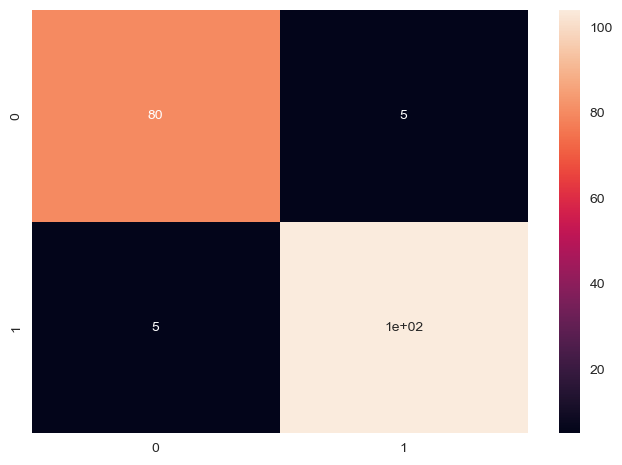

In [36]:
cm_train = confusion_matrix(y_train, pred_train)
sns.heatmap(cm_train, annot=True)

In [37]:
print(classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        85
           1       0.95      0.95      0.95       109

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194


In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_train_prob = proba_train[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, y_train_prob)

auc = roc_auc_score(y_train, y_train_prob)
round(auc,3)

0.986

Evaluate on test now

<AxesSubplot: >

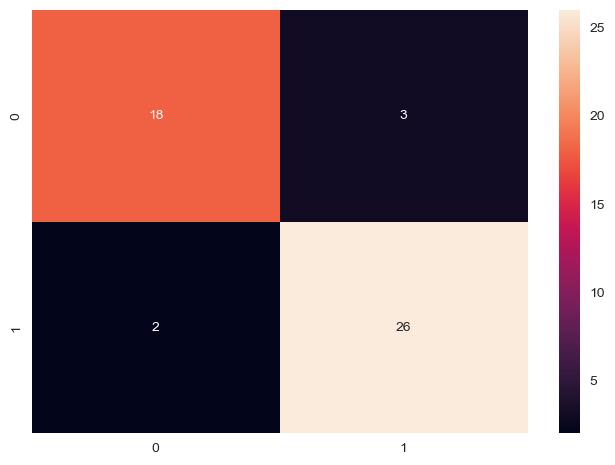

In [39]:
proba_test = clf.predict_proba(X_test)
pred_test = clf.predict(X_test)
cm_test = confusion_matrix(y_test, pred_test)
sns.heatmap(cm_test, annot=True)

In [40]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88        21
           1       0.90      0.93      0.91        28

    accuracy                           0.90        49
   macro avg       0.90      0.89      0.90        49
weighted avg       0.90      0.90      0.90        49


In [43]:
y_test_prob = proba_test[:, 1]

# ROC
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_prob)

# AUC 
auc_test = roc_auc_score(y_test, y_test_prob)
round(auc_test,3)

0.937

data_fire= 'Algeria_forest.joblib'

import joblib
joblib.dump(data,data_fire)

print(f'Data is in {data_fire}')